In [9]:
import matplotlib.pyplot as plt # this helps with writing cleaner code
import matplotlib as mpl
import random # used to randomly generate values

import numpy as np # useful for holding data for plotting

Matplotlib is building the font cache; this may take a moment.


In [10]:
np.random.seed(42) # set the seed for random number generation to get the same values each time
groups = ["a", "b", "c"]
group_data =[random.choice(groups) for x in range(50)]
var_data = np.random.randn(50) # generate 50 random floats
int_data = np.random.randint(0, 50, 50) # generate 50 random integers between 0 and 50

In [17]:
# we can store these in a dict for now
plot_data = {"groups": group_data, "vars": var_data, "counts": int_data} # the names don't matter, just so they are vaguely informative

In [14]:
import seaborn as sbn
import pandas as pd

In [20]:
plot_df = pd.DataFrame(plot_data) # seaborn uses a dataframe as a common input data format
plot_df.head()

,groups,vars,counts
0,c,0.496714,40
1,a,-0.138264,28
2,c,0.647689,14
3,a,1.523030,44
4,b,-0.234153,0


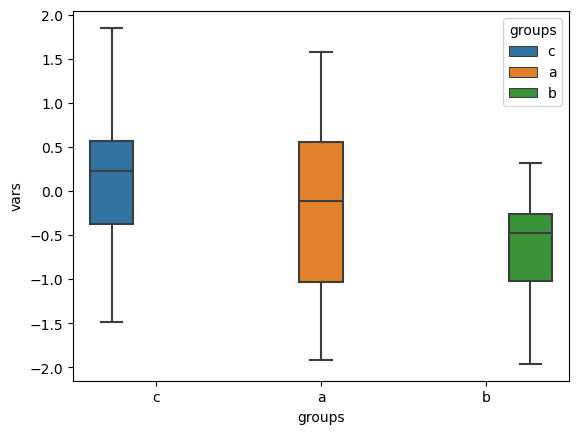

In [26]:
# make a boxplot
sbn.boxplot(plot_df, x="groups", y="vars", hue="groups")
plt.show()

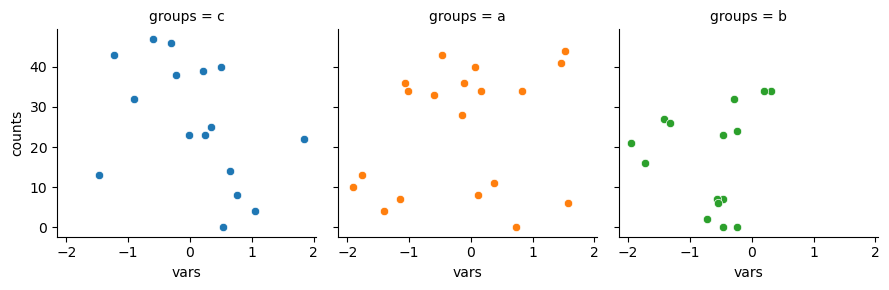

In [29]:
facet = sbn.FacetGrid(plot_df, col="groups", hue="groups")
facet.map(sbn.scatterplot, "vars", "counts")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


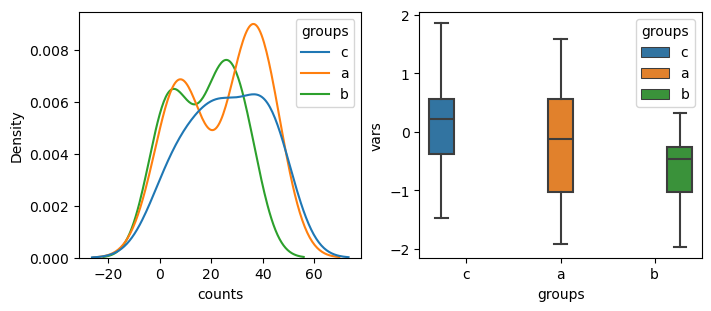

In [34]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(7, 3), layout="constrained")
sbn.boxplot(plot_df, x="groups", y="vars", hue="groups", ax=ax[1])
sbn.kdeplot(plot_df, x="counts", hue="groups", ax=ax[0])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


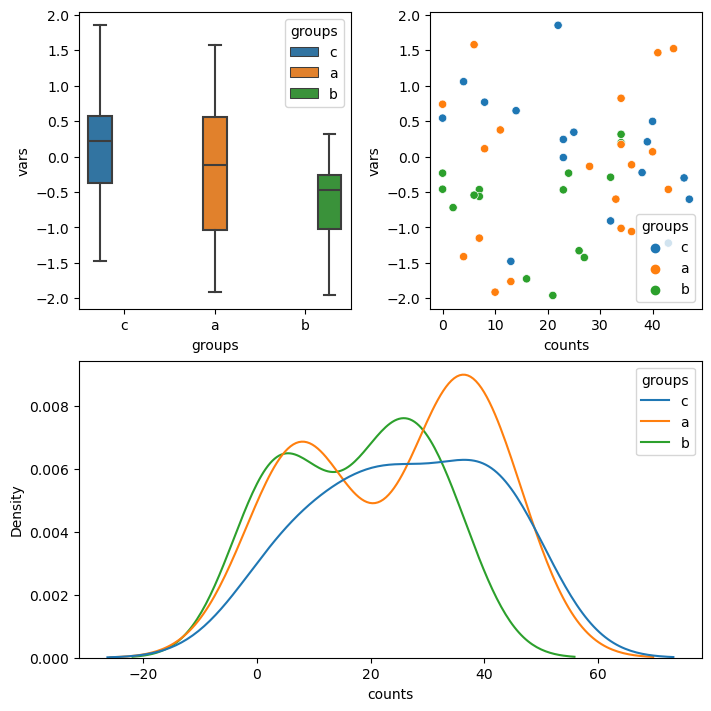

In [37]:
fig, ax = plt.subplot_mosaic([["box", "scatter"],["hist", "hist"]], 
                             figsize=(7, 7), layout="constrained")
sbn.boxplot(plot_df, x="groups", y="vars", hue="groups", ax=ax["box"])
sbn.scatterplot(plot_df, x="counts", y="vars", hue="groups", ax=ax["scatter"])
sbn.kdeplot(plot_df, x="counts", hue="groups", ax=ax["hist"])
plt.show()

In [42]:
file_data = []

test_file = open("RAS_gene_data.txt")
lines = test_file.readlines() # this reads all of the lines at once into memory
for xline in lines:
    xline = xline.rstrip("\n") # remove the trailing newline character
    file_data.append(xline)
    
# we have to close the file
test_file.close()
file_data

['species\tsequence\tgene\tseqid\tGC\tAA\tSer.Thr.Count',
 'Rattus.norvegicus\tGCCGTTCATGGCGGTTTCGGGGTCTCCAACAGCTTCTCAGGTTGAAATCCAAAAGCCTCCCGAGGCGGGGTCTGCGGAGTTTGAGATTTTTGCAGGTGTGAAATGACTGAGTACAAACTGGTGGTGGTTGGAGCAGGTGGCGTTGGGAAAAGTGCTTTGACAATCCAGCTAATCCAGAACCACTTTGTGGATGAATATGATCCCACCATAGAGGATTCTTACCGAAAACAAGTGGTGATTGACGGTGAGACCTGTCTACTGGACATACTGGACACAGCTGGACAAGAGGAGTACAGTGCCATGAGAGACCAATACATGAGGACAGGCGAAGGGTTCCTCTGTGTGTTTGCCATCAATAATAGCAAATCCTTTGCAGATATTAACCTCTACAGGGAGCAAATTAAGCGCGTGAAAGACTCTGATGATGTACCCATGGTGCTGGTAGGGAACAAGTGTGACTTGCCAACAAGGACAGTTGACACAAAGCAAGCCCACGAGCTGGCCAAGAGTTATGGAATTCCATTCATTGAAACCTCAGCCAAGACCCGACAGGGTGTGGAGGATGCCTTTTACACGCTTGTAAGGGAGATACGCCAGTACCGGATGAAGAAGCTCAACAGCAGTGAGGATGGCACTCAAGGCTGTATGGGGCTGCCCTGTGTGGTGATGTAGTAAGACCCTTTAAAAGTTCTGTCATCAGAAACGAGCCACTTTCAAGCCTCACTGATGCCCTGGTTCTGACATCCCTGGAGGAGACGTGTTTCTGCTGCTCTCTGCATCTCAGAGAAGCTCCTGCTTCCTGCTTCCCCAACTTAGTTACTGAGCACAGCCATCTAACCTGAGACCTCTTCAGAATAACTACCTCCTCACTCGGCTGTCCGACCAGAGAAATGAACCTGTTTCTCCCCAGTAGTTCTCTGC

In [59]:
with open("RAS_gene_data.txt") as myfile:
    for line in myfile.readlines():
        line = line.rstrip("\n")
        split_line = line.split("\t")
        print(split_line)
        break

['species', 'sequence', 'gene', 'seqid', 'GC', 'AA', 'Ser.Thr.Count']


In [61]:
idx = 0
col_names = []
data_lines = []

with open("RAS_gene_data.txt") as myfile:
    for line in myfile.readlines():
        line = line.rstrip("\n")
        split_line = line.split("\t")
        # print(split_line)

        if idx == 0:
            col_names = split_line
        else:
            data_lines.append(split_line)

        idx += 1
        

In [63]:
col_names

['species', 'sequence', 'gene', 'seqid', 'GC', 'AA', 'Ser.Thr.Count']